# モジュール実行用

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append("/content/drive/My Drive/Pipeline")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#importでの実行

## HSV回転

In [9]:
from opencv.color_cvt import read_img, hsv_rotation, chromakey, cut_roi, roi_cvt, roi_to_img,color_plot,median_plot_2,dropper, layer_to_img
import matplotlib.pyplot as plt
import cv2

透過画像 (572, 696, 4)


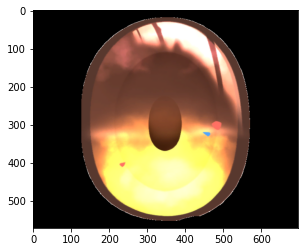

In [74]:
# イメージパス
image_path = "右目.png"
# RGBの取得とalphaチャンネルの取得
img, alpha_ch = read_img(image_path)

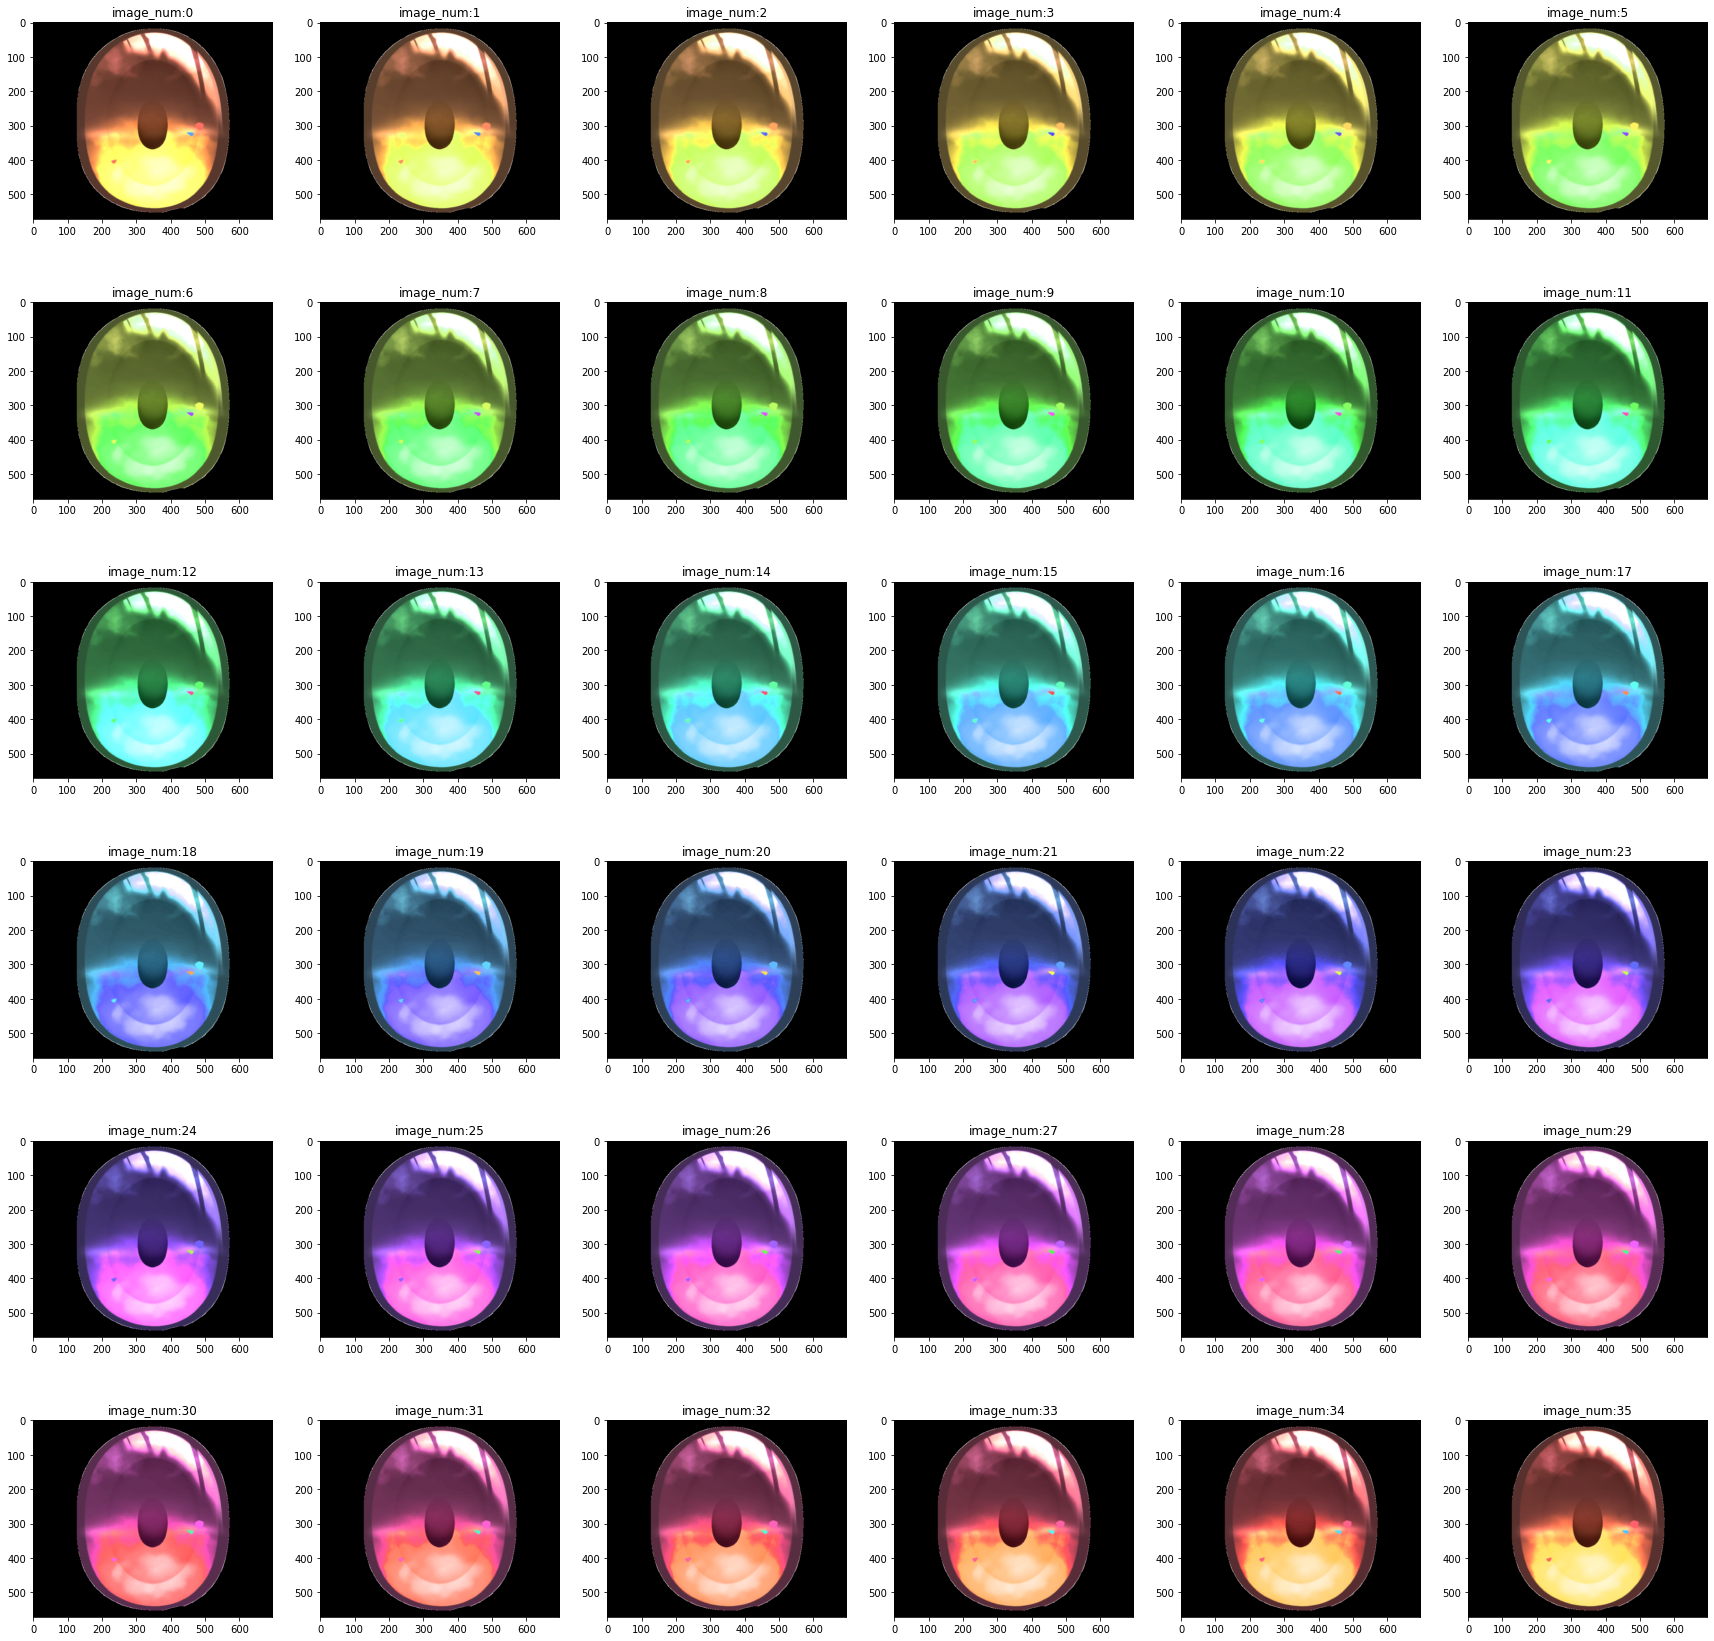

In [79]:
image_list = hsv_rotation(img,alpha_ch, x=6,y=6
                        )

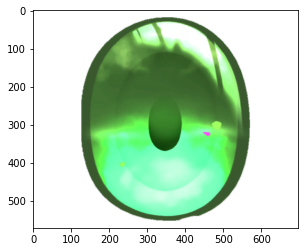

In [76]:
get_image = image_list[15]
plt.imshow(get_image)

In [73]:
#保存
output_path = "ad.png"
cv2.imwrite(output_path,get_image)

True

### 一層目

In [ ]:
#コンフィグ
layers = {} #レイヤーの保存layer[0] = [new_roi,xy]

透過画像 (572, 696, 4)


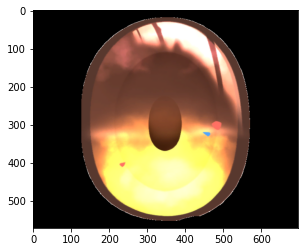

In [ ]:
# イメージパス
image_path = "右目.png"
# RGBの取得とalphaチャンネルの取得
img, alpha_ch = read_img(image_path)

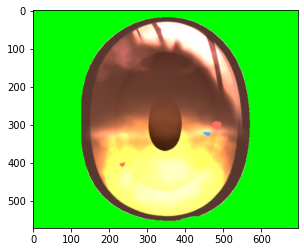

In [ ]:
# クロマキー処理：透過部分（黒色部分）を指定色に変換
chromakey_img,black_index = chromakey(img,rgb="G")

r_median 114 g_median 66 b_median 49
(200, 410, 3) (200, 410)
median2_list [115, 66, 49]


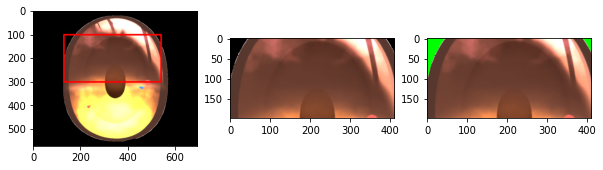

In [ ]:
# xy ⇒[x,x_h,y,y_h]
xy = [130, 540, 100, 300]
#roiの切り出し（色を塗る部分を切り出し）情報量の取り出し
roi, rgb_list, median_list, xy,median2_list = cut_roi(img,xy,thickness=5)

plus_list [35, -2, 21]


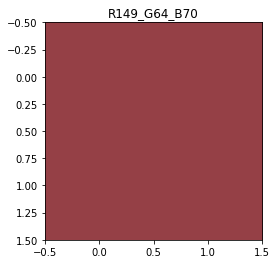

In [ ]:
# drop_color（塗りたい色のRGB）
drop_color = [149,64,70]

#中央値からのupdown_listの設定[r_up, r_down, g_up, g_down, b_up, b_down]
updown_list=[55,55,55,55,55,55]

#pulslistの取得
plus_list = dropper(median_list,drop_color)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


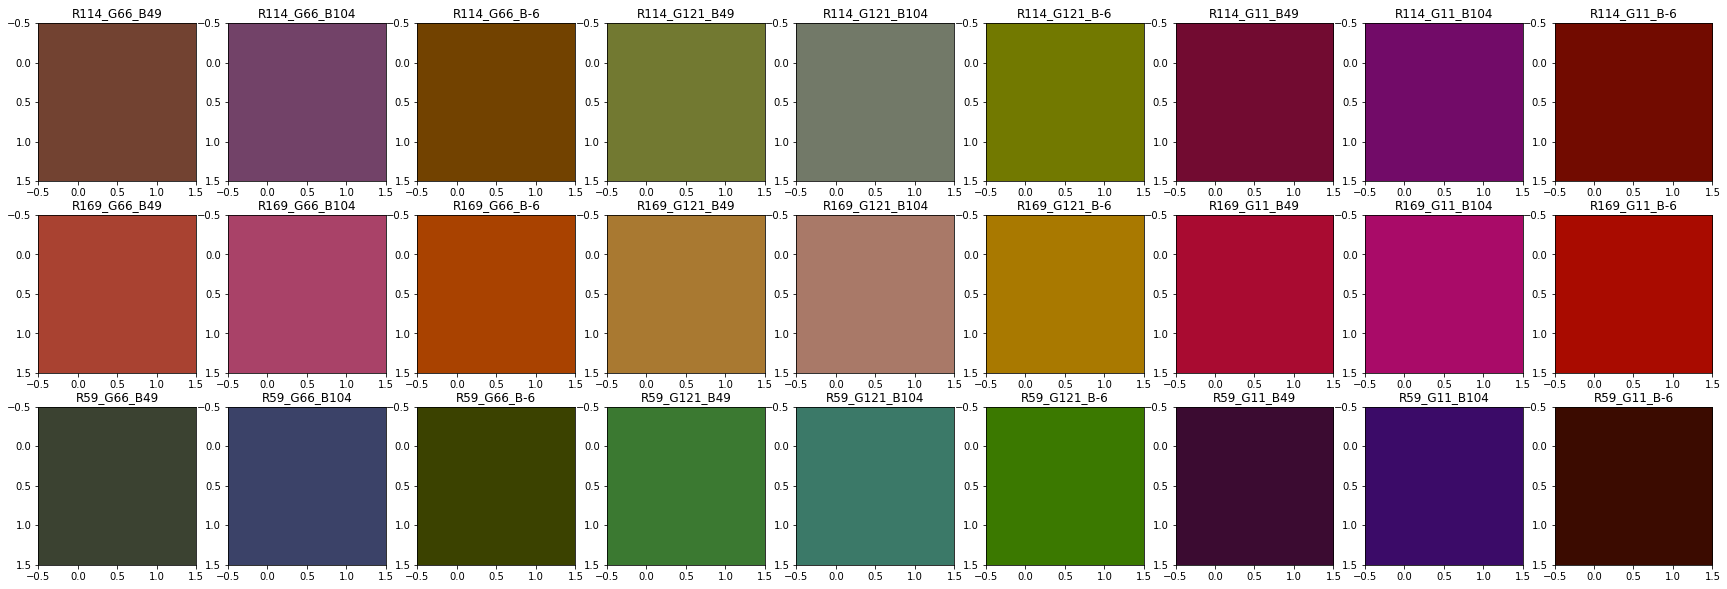

In [ ]:
# 中央値近辺
median_plot_2(median_list, updown_list)

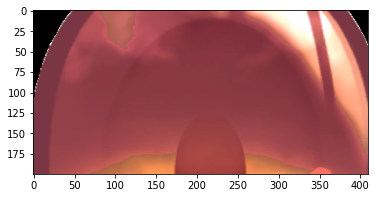

In [ ]:


#色塗り
new_roi = roi_cvt(roi,rgb_list, median_list,plus_list,updown_list)
#レイヤーの保存
layers[0] = [new_roi,xy]

レイヤーの枚数 1
(572, 696, 4)


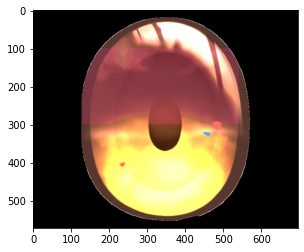

In [ ]:
 #outputpath
 output_path="/content/new.png"
 result = layer_to_img(img,alpha_ch,layers,output_path)

### 二層目

透過画像 (572, 696, 4)


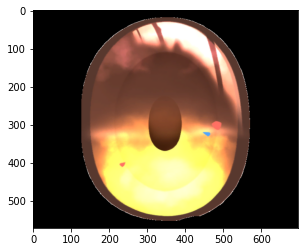

In [ ]:
# イメージパス
image_path = "右目.png"
# RGBの取得とalphaチャンネルの取得
img, alpha_ch = read_img(image_path)

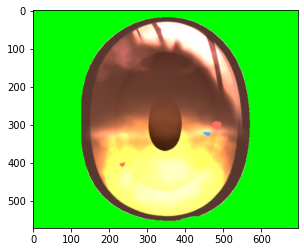

In [ ]:
# クロマキー処理：透過部分（黒色部分）を指定色に変換
chromakey_img,black_index = chromakey(img,rgb="G")

r_median 0 g_median 0 b_median 0
(572, 696, 3) (572, 696)
median2_list [163, 94, 71]


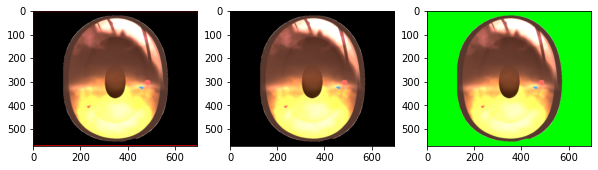

In [ ]:
# xy ⇒[x,x_h,y,y_h]
xy = [0, 696, 0, 572]
#roiの切り出し（色を塗る部分を切り出し）情報量の取り出し
roi, rgb_list, median_list, xy,median_list2 = cut_roi(img,xy,thickness=5)

plus_list [-14, -30, -1]


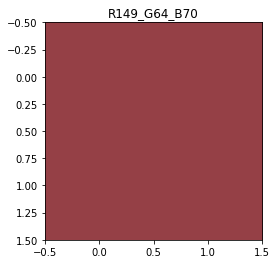

In [ ]:
# drop_color（塗りたい色のRGB）
drop_color = [149,64,70]

#中央値からのupdown_listの設定[r_up, r_down, g_up, g_down, b_up, b_down]
updown_list=[55,55,55,55,55,55]

#pulslistの取得
plus_list = dropper(median_list2,drop_color)

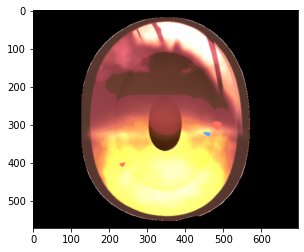

In [ ]:
#色塗り
plus_list=[35, -2, 21]
new_roi = roi_cvt(roi,rgb_list, median_list2,plus_list,updown_list)
#レイヤーの保存
layers[0] = [new_roi,xy]

レイヤーの枚数 1
(572, 696, 4)


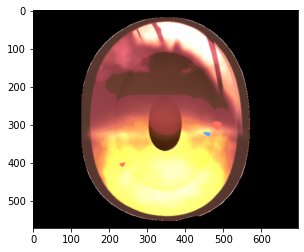

In [ ]:
 #outputpath
 output_path="/content/new.png"
 result = layer_to_img(img,alpha_ch,layers,output_path)

# .pyでの実行